In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

### Read image

In [2]:
input_dir = 'dataset/input'
output_dir = 'dataset/output'
path = "C:/Users/Stephanie/Desktop/TDS3651 - VIP/[TDS3651] Assignment/dataset/input/"
image = cv2.imread(path + 'BloodImage_00006.jpg')

### Image Pre-processing

###### Image sharpening (Median filter - preserve Edges)

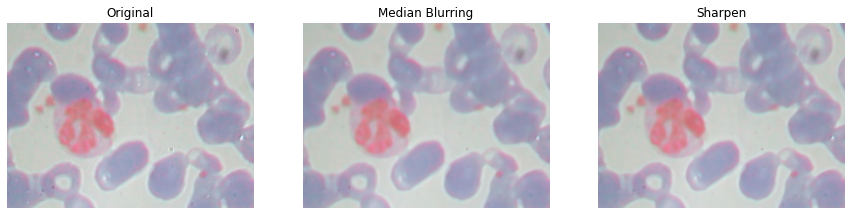

In [3]:
median = cv2.medianBlur(image, 9) 
smoothened = cv2.blur(median, (5,5))
details = median - smoothened
img = median + details

plt.figure(figsize=(15,8))
plt.subplot(131), plt.imshow(image), plt.title("Original"), plt.axis("off")
plt.subplot(132), plt.imshow(median), plt.title("Median Blurring"), plt.axis("off")
plt.subplot(133), plt.imshow(img), plt.title("Sharpen"), plt.axis("off")
plt.show()
plt.imsave("original img.png", image)
plt.imsave("sharpen img.png", img)

###### Convert Image Type

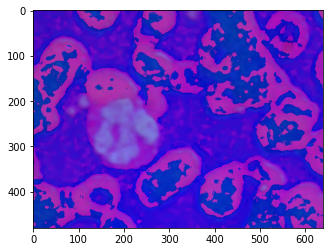

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_copy = image.copy()
plt.imshow(img_hsv)
plt.imsave("hsv_img.png", img_hsv)

## Graph

###### HSV channels with color bar

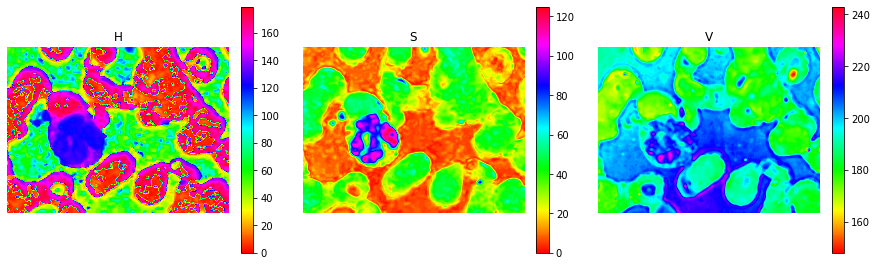

In [5]:
fig, axs = plt.subplots(1,3, figsize=(15,10))

channels = ['H', 'S', 'V']

for i, ax in enumerate(axs[0:3]): 
    j=ax.imshow(img_hsv[:,:,i], cmap='hsv')
    ax.axis('off')
    ax.set_title(channels[i])
    plt.colorbar(j, ax=axs[i], fraction=0.05, pad=0.05)
    plt.savefig('books_read.png')    
    
plt.show()

###### 3D Color Graph

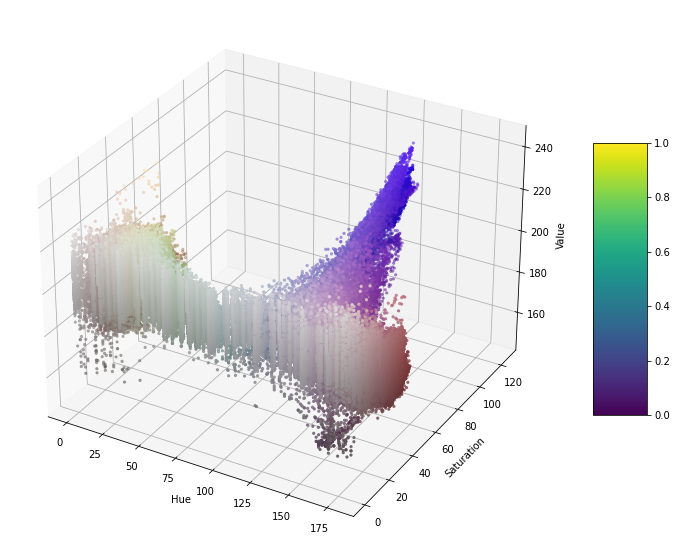

In [6]:
pixel_colors = img_rgb.reshape((np.shape(img_rgb)[0]*np.shape(img_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

h, s, v = cv2.split(img_hsv)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1, projection="3d")
sctt = ax.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_zlabel("Value")
plt.show()

## Segmentation

In [24]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

###### Background

In [25]:
bg_lower = np.array([20, 0, 180]) 
bg_upper = np.array([140, 35, 220]) 
mask_bg = cv2.inRange(img_hsv, bg_lower, bg_upper)

In [27]:
#remove noise
mask_bg = cv2.inRange(img_hsv, bg_lower, bg_upper)
mask_bg = cv2.morphologyEx(mask_bg, cv2.MORPH_CLOSE, kernel, iterations=3)
#fill up holes
mask_bg = cv2.morphologyEx(mask_bg, cv2.MORPH_OPEN, kernel, iterations=3)

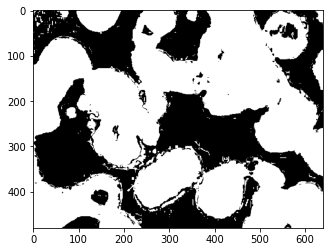

In [101]:
not_mask_bg = cv2.bitwise_not(mask_bg)
plt.imshow(not_mask_bg, cmap='gray')
not_result_bg = cv2.bitwise_and(img_rgb, img_rgb, mask=not_mask_bg)
plt.imsave("bg_not.png", not_result_bg)

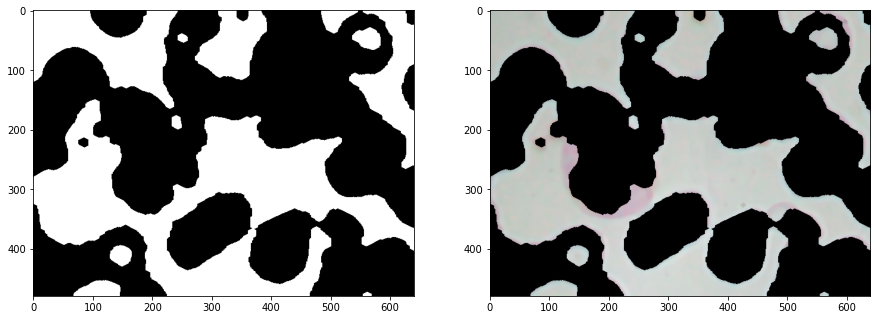

In [28]:
plt.figure(figsize=(15,10))
result_bg = cv2.bitwise_and(img, img, mask=mask_bg)
plt.subplot(121), plt.imshow(mask_bg, cmap='gray')
plt.subplot(122), plt.imshow(result_bg)
plt.show()
plt.imsave("mask_bg_m.png", mask_bg, cmap='gray')

###### Smooth Edges

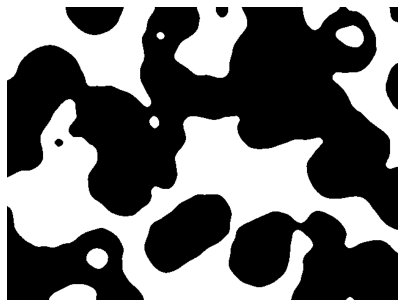

In [29]:
smooth_bg = cv2.medianBlur(mask_bg, 15)
plt.figure(figsize=(7,7)), plt.imshow(smooth_bg, cmap='gray')
plt.axis("off")
plt.imsave("smooth bg.png", smooth_bg, cmap='gray')         

###### White Blood Cell

In [60]:
whiteblood_lower = np.array([110, 40, 180]) 
whiteblood_upper = np.array([155, 145, 240]) 
mask_whiteblood = cv2.inRange(img_hsv, whiteblood_lower, whiteblood_upper)

In [61]:
#fill up holes
mask_whiteblood = cv2.inRange(img_hsv, whiteblood_lower, whiteblood_upper)
mask_whiteblood = cv2.morphologyEx(mask_whiteblood, cv2.MORPH_OPEN, kernel, iterations=9)
#remove noise
mask_whiteblood = cv2.morphologyEx(mask_whiteblood, cv2.MORPH_CLOSE, kernel, iterations=9)

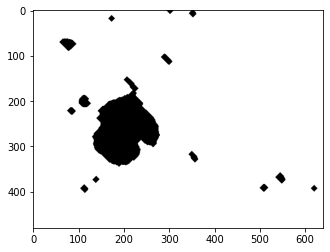

In [86]:
not_mask_whiteblood = cv2.bitwise_not(mask_whiteblood)
plt.imshow(not_mask_whiteblood, cmap='gray')
not_result_whiteblood = cv2.bitwise_and(img_rgb, img_rgb, mask=not_mask_whiteblood)
#plt.imsave("whiteblood_bg_not.png", not_result_whiteblood)

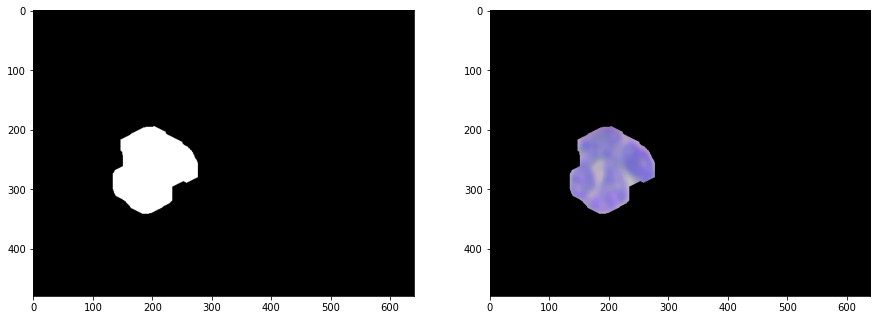

In [62]:
plt.figure(figsize=(15,10))
result_whiteblood = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_whiteblood)
plt.subplot(121), plt.imshow(mask_whiteblood, cmap='gray')
plt.subplot(122), plt.imshow(result_whiteblood)
plt.show()
plt.imsave("whiteblood_mask.png", mask_whiteblood, cmap='gray')

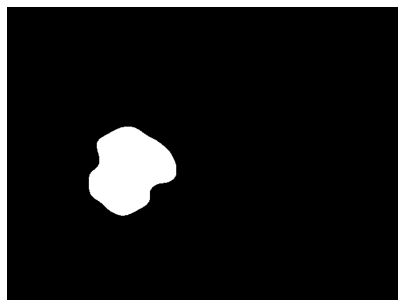

In [63]:
smooth_whiteblood = cv2.medianBlur(mask_whiteblood, 15)
plt.figure(figsize=(7,7)), plt.imshow(smooth_whiteblood, cmap='gray')
plt.axis("off")
plt.imsave("smooth whiteblood.png", smooth_whiteblood, cmap='gray')

###### Red Blood Cell

In [51]:
redblood_lower = np.array([150, 0, 140]) 
redblood_upper = np.array([210, 80, 220]) 
mask_redblood = cv2.inRange(img_hsv, redblood_lower, redblood_upper)

In [52]:
#enlarge white region
mask_redblood = cv2.dilate(mask_redblood, kernel, iterations=6)
#fill up holes
mask_redblood = cv2.morphologyEx(mask_redblood, cv2.MORPH_OPEN, kernel, iterations=1)

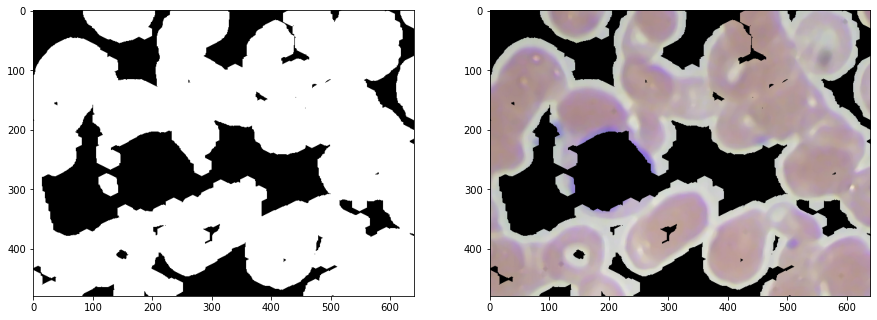

In [53]:
plt.figure(figsize=(15,10))
result_redblood = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_redblood)
plt.subplot(121), plt.imshow(mask_redblood, cmap='gray')
plt.subplot(122), plt.imshow(result_redblood)
plt.show()
plt.imsave("redblood_bg_m.png", mask_redblood, cmap='gray')

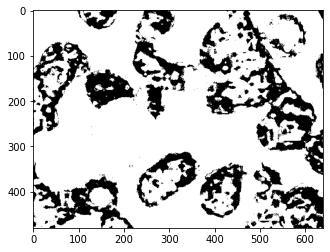

In [43]:
not_mask_redblood = cv2.bitwise_not(mask_redblood)
plt.imshow(not_mask_redblood, cmap='gray')
not_result_redblood = cv2.bitwise_and(img_rgb, img_rgb, mask=not_mask_redblood)
plt.imsave("rb_not.png", not_result_redblood)

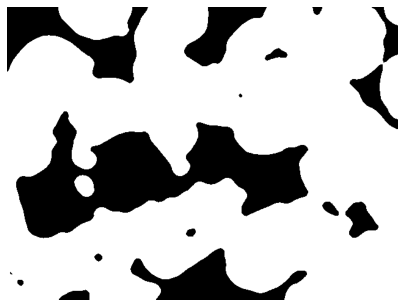

In [54]:
#smooth edges using median blur
smooth_redblood = cv2.medianBlur(mask_redblood, 15)
plt.figure(figsize=(7,7)), plt.imshow(smooth_redblood, cmap='gray')
plt.axis("off")
plt.imsave("smooth redblood.png", smooth_redblood, cmap='gray')

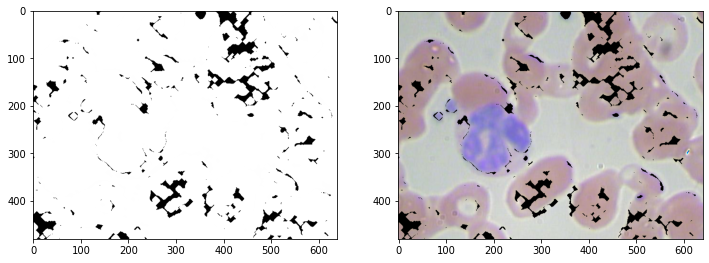

In [24]:
final_mask = mask_bg + mask_whiteblood + mask_redblood
final_result = cv2.bitwise_and(img_rgb, img_rgb, mask=final_mask)
plt.figure(figsize=(12,10))
plt.subplot(121), plt.imshow(final_mask, cmap="gray")
plt.subplot(122), plt.imshow(final_result)
plt.show()